Olá, Thaynnan

Meu nome é Ramon. Ao ao longo do texto farei algumas observações sobre melhorias no código. Nas partes em que não houver comentários, está tudo certo, ok? Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser consertado, caso contrário seu projeto **não** será aceito.
</div>

Você pode me responder usando isso:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

###

<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

Obrigado por enviar seu projeto. 
    
Parabéns, você fez um bom trabalho.

Como pontos fortes do projeto, destaco:
- Código simples e eficiente (sem loop desnecessário)
- Uso adequado dos recursos da lição
- Bons gráficos
    
    
Bom trabalho. Não encontrei sugestão de melhoria. Desejo sucesso na jornada.


</div>




Data: 15-04-2025.

Autor: Thaynnan Aurick Silva e Souza.

# Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans

# 1 Carregando dados

In [3]:
df = pd.read_csv('C:/Users/LENOVO i5 Gaming/Downloads/gym_churn_us.csv')

In [4]:
df.info()#sanity check.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [5]:
df.head(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


# 2. Realize análise exploratória dos dados (AED)

* 2.1 Olhe para o conjunto de dados: ele contém alguma característica ausente? Estude a média de valores e desvio padrão (use o método describe())

In [6]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


* 2.2 Observe a média dos valores médios das características em dois grupos: para aqueles que ficaram (use o método groupby()).

In [7]:
df['Status'] =  df['Churn'].apply(lambda x: 'Ativo' if x > 0 else 'Inativo')
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,Status
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,Inativo
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,Inativo
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,Inativo
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,Inativo
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,Inativo


In [8]:
df_mean = df.groupby('Churn').mean(numeric_only=True).round(2)
df_mean

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.51,0.87,0.53,0.35,0.9,5.75,0.46,29.98,158.45,5.28,4.71,2.02,2.03
1,0.51,0.77,0.36,0.18,0.9,1.73,0.27,26.99,115.08,1.66,0.99,1.47,1.04


* 2.3 Faça histogramas de barra e distribuições de características para aqueles que saíram (rotatividade) e aqueles que ficaram

In [9]:
df_ativo = df[df['Churn'] == 1] 
df_inativo = df[df['Churn'] == 0]

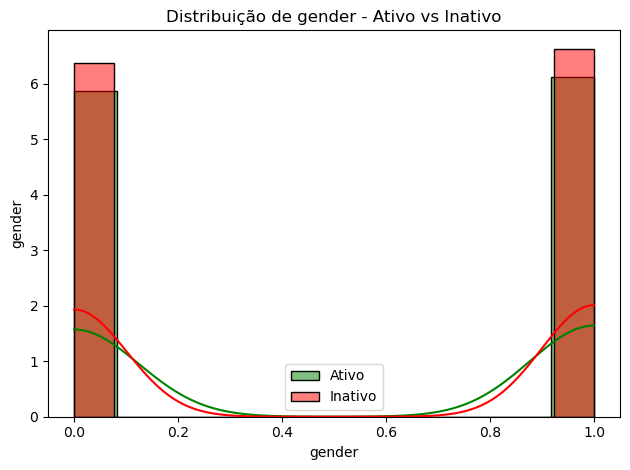

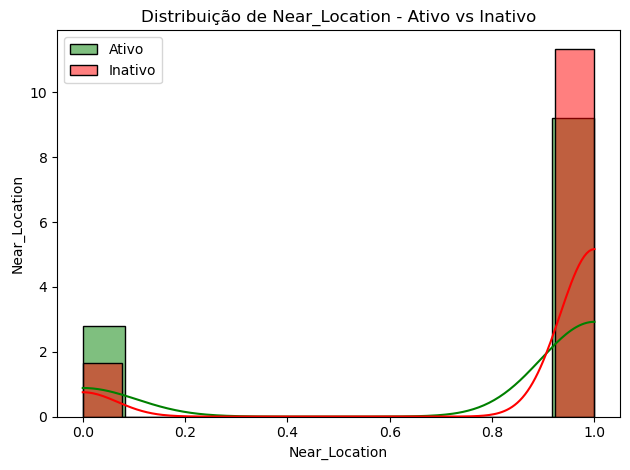

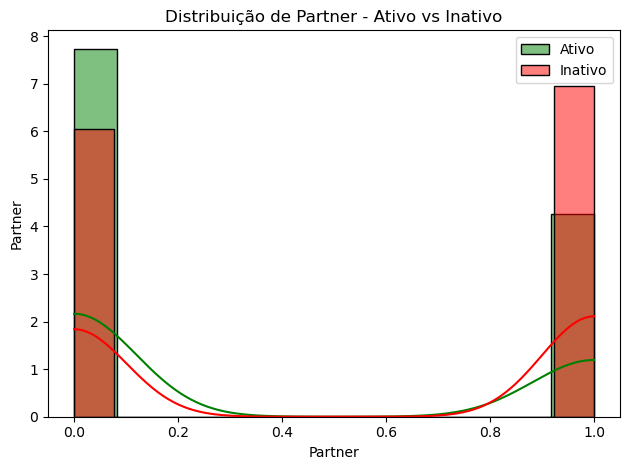

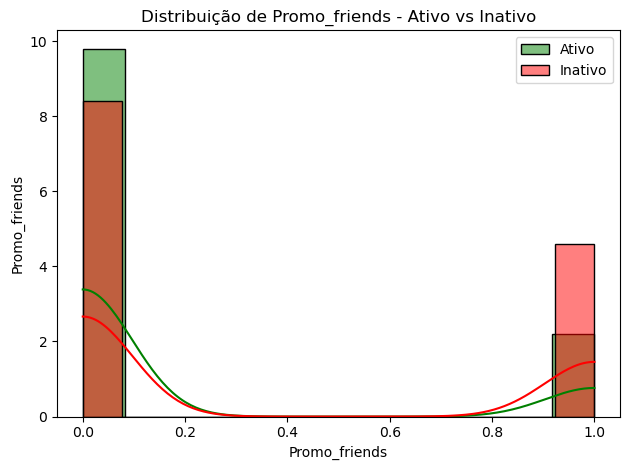

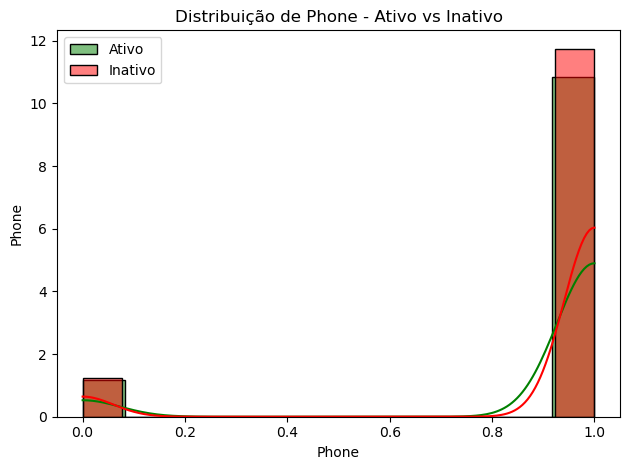

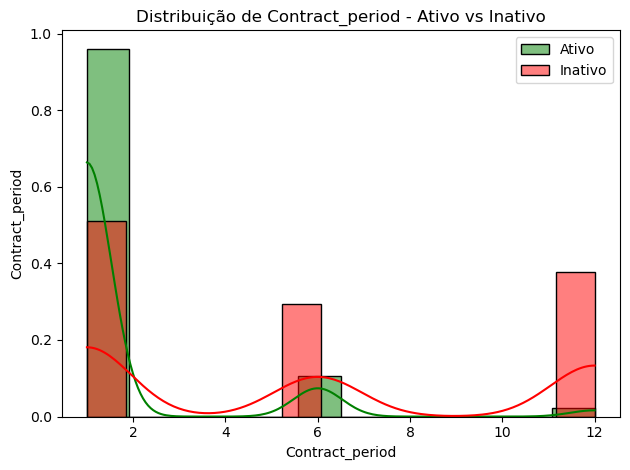

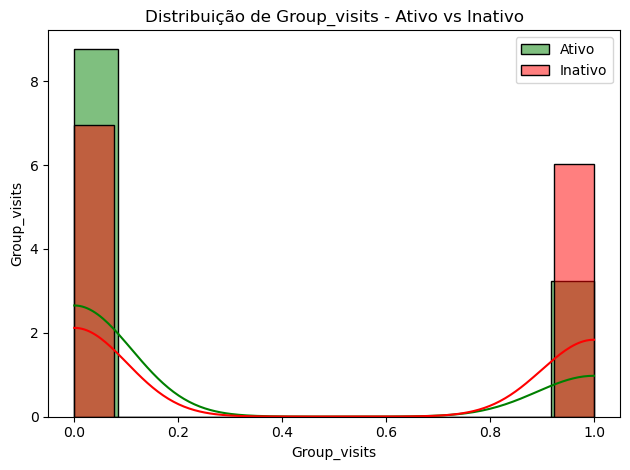

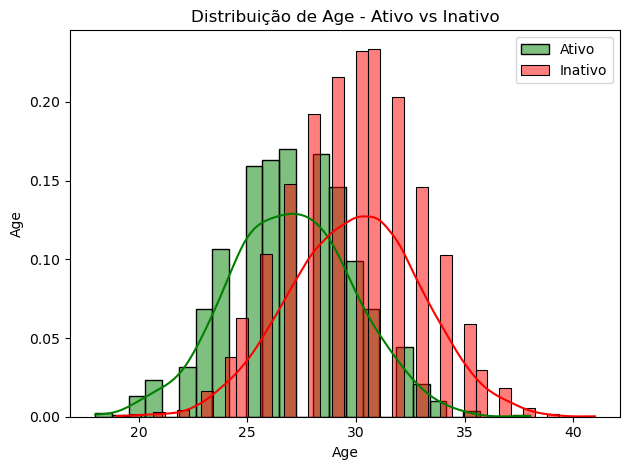

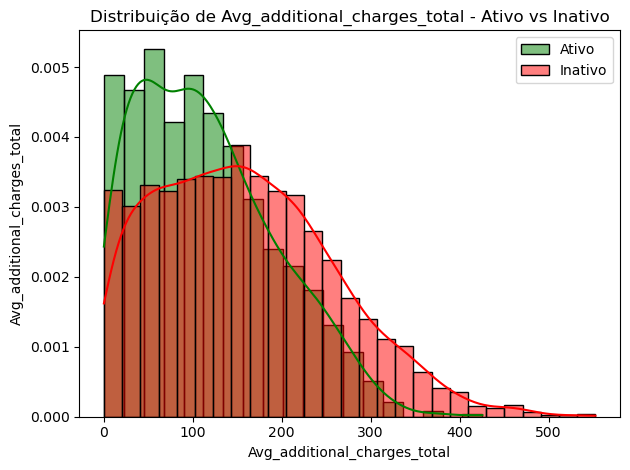

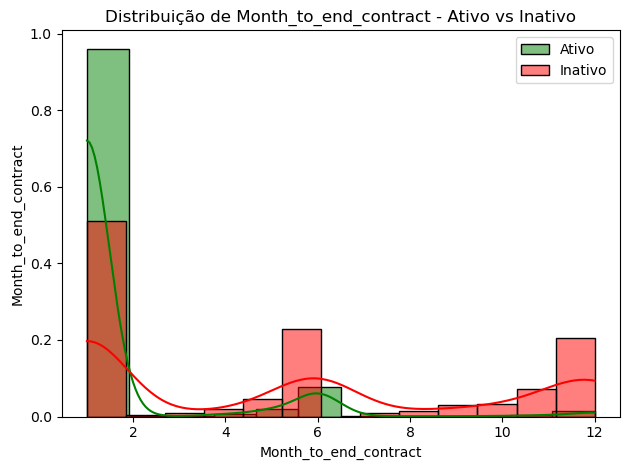

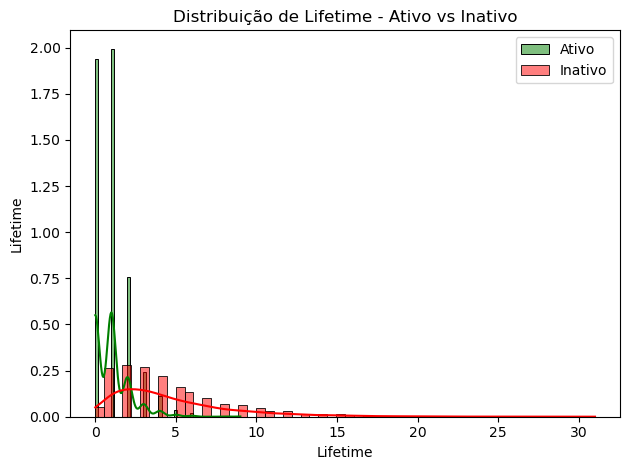

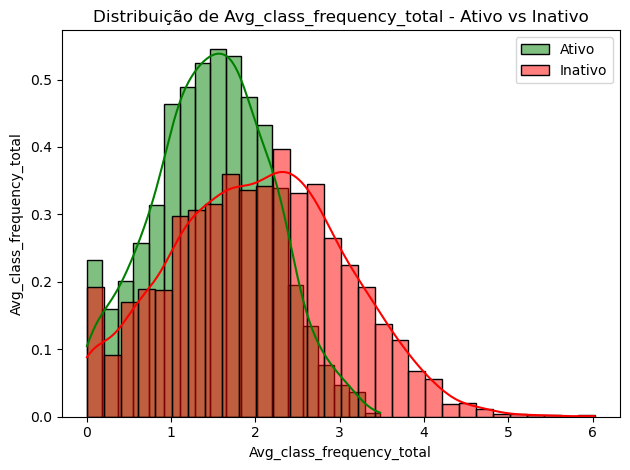

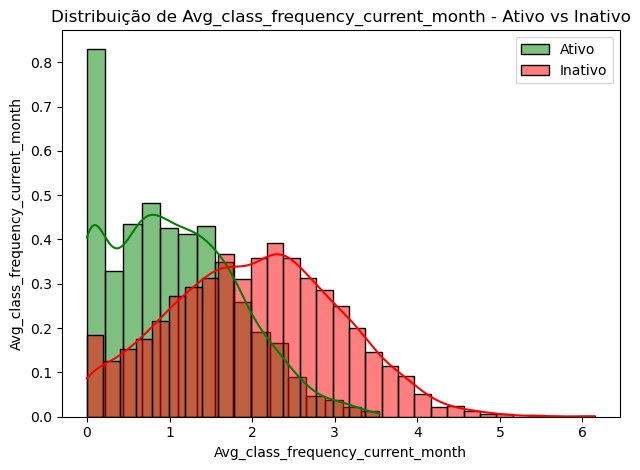

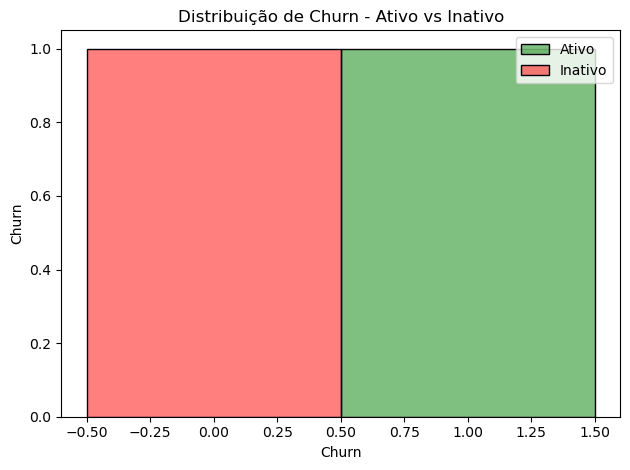

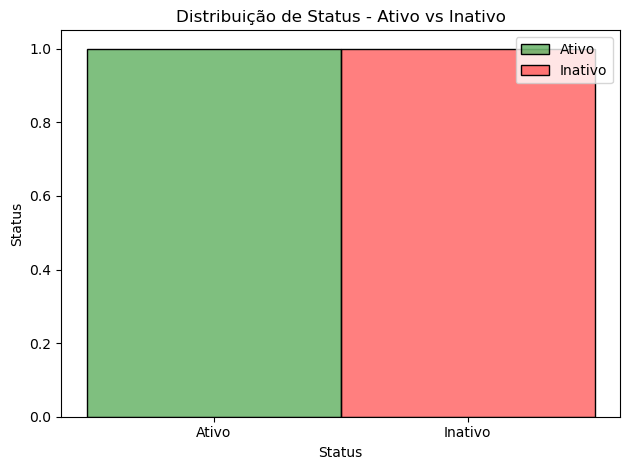

In [10]:
# Histograma para aqueles que saíram
colunas_numericas = df.columns

#ou usar df.columns

for col in colunas_numericas:
    sns.histplot(df_ativo[col], color='green', label='Ativo', kde=True, stat="density", alpha=0.5)
    sns.histplot(df_inativo[col], color='red', label='Inativo', kde=True, stat="density", alpha=0.5)
    plt.title(f'Distribuição de {col} - Ativo vs Inativo')
    plt.xlabel(col)
    plt.ylabel(col)
    plt.legend()
    plt.tight_layout()
    plt.show()

* 2.4 Faça uma matriz de correlação e a exiba.

                                     gender  Near_Location   Partner  \
gender                             1.000000       0.006699 -0.010463   
Near_Location                      0.006699       1.000000 -0.005119   
Partner                           -0.010463      -0.005119  1.000000   
Promo_friends                     -0.005033       0.210964  0.451960   
Phone                             -0.008542      -0.015763  0.009970   
Contract_period                    0.000502       0.150233  0.306166   
Group_visits                       0.017879       0.154728  0.022710   
Age                                0.013807       0.058358  0.047480   
Avg_additional_charges_total      -0.009334       0.040761  0.022941   
Month_to_end_contract             -0.001281       0.143961  0.294632   
Lifetime                           0.013579       0.070921  0.061229   
Avg_class_frequency_total          0.014620       0.043127  0.024938   
Avg_class_frequency_current_month  0.009156       0.062664  0.04

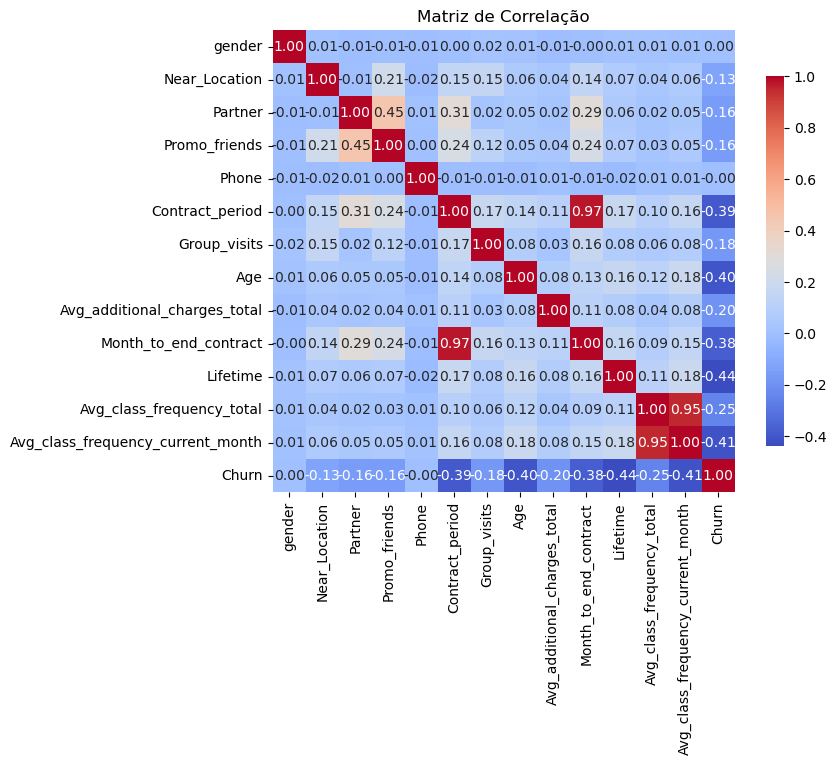

In [11]:
df_numerico = df.select_dtypes(include='number')
correlation_matrix  = df_numerico.corr()
print(correlation_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlação')
plt.show()

# 3 Construa um modelo para predizer a rotatividade de clientes

3.1 Construa um modelo de classificação binária para clientes onde a variável objetivo é a saída de usuários do próximo mês.

3.2 Divida os dados de treinamento e validação em dois conjuntos usando a função train_test_split().

3.3 Treine o modelo no conjunto com dois métodos:
regressão logística
floresta aleatória

3.4 Avalie acurácia, precisão e sensibilidade para ambos os modelos usando dados de validação. Use-os para comparar os modelos. Qual modelo rendeu melhores resultados?

In [12]:
# 3.1 Contruindo um modelo de classificação binaria.
df_numerico = df.select_dtypes(include='number')# Supondo que a variável alvo seja 'Churn' e as features sejam todas as outras colunas
X = df_numerico.drop('Churn', axis=1)
y = df_numerico['Churn']

# 3.2 Dividinda os dados de treinamento e validação em dois conjuntos usando a função train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalonando os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3.3 Treinando o modelo de Regressão Logística com aumento de iterações
log_model = LogisticRegression(max_iter=200)  # Aumentando o número de iterações
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

# Treinando o modelo de Floresta Aleatória
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)  # Não é necessário escalar para Floresta Aleatória
y_pred_rf = rf_model.predict(X_test)

# 3.4 Avaliando o modelo de Regressão Logística
accuracy_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)

# Avaliando o modelo de Floresta Aleatória
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)

# Exibindo os resultados
print("Resultados da Regressão Logística:")
print(f"Acurácia: {accuracy_log:.2f}")
print(f"Precisão: {precision_log:.2f}")
print(f"Recall: {recall_log:.2f}")
print("\nResultados da Floresta Aleatória:")
print(f"Acurácia: {accuracy_rf:.2f}")
print(f"Precisão: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")

# Comparando os modelos
if accuracy_log > accuracy_rf:
    print("\nO modelo de Regressão Logística teve melhor desempenho.")
else:
    print("\nO modelo de Floresta Aleatória teve melhor desempenho.")

Resultados da Regressão Logística:
Acurácia: 0.92
Precisão: 0.87
Recall: 0.78

Resultados da Floresta Aleatória:
Acurácia: 0.92
Precisão: 0.87
Recall: 0.79

O modelo de Floresta Aleatória teve melhor desempenho.


# 4 Crie agrupamentos de clientes

* 4.1 Padronize os dados.
* 4.2 Use a função linkage() para construir a matriz das distâncias baseada na matriz de características padronizada e construa um dendrograma. Perceba: renderizar o dendrograma pode demorar um tempo! Use o gráfico resultante para estimar o número de agrupamentos que você pode destacar.

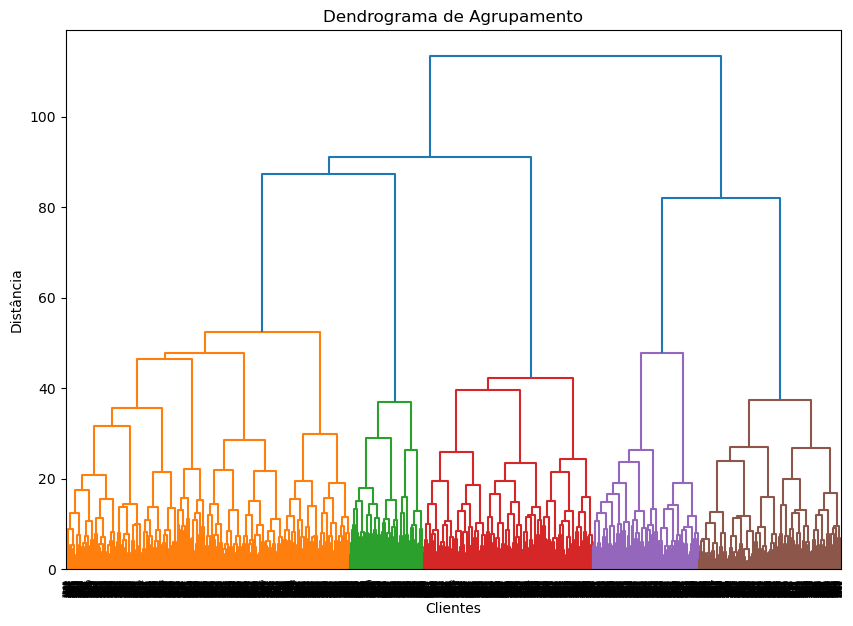

In [13]:
features = df.select_dtypes(include='number')
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 4. Construindo a matriz de distâncias e dendrograma
linked = linkage(features_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrograma de Agrupamento')
plt.xlabel('Clientes')
plt.ylabel('Distância')
plt.show()

* 4.3 Treine o modelo de agrupamento com o algoritmo K-means e preveja agrupamentos de clientes. (Deixe que o número de agrupamentos seja n=5,para que seja fácil comparar seus resultados com os de outros estudantes.
* 4.4 Olhe para os valores médios das características para agrupamentos. Nada chama a sua atenção?
* 4.5 Faça distribuições de características para os agrupamentos. Você notou alguma coisa?
* 4.6 Calcule a taxa de rotatividade para cada agrupamento (use o método groupby()). Eles diferem em termos de taxa de rotatividade? Quais agrupamentos são propensos a sair, e quais são leais?

Valores Médios das Características por Agrupamento:
           gender  Near_Location   Partner  Promo_friends  Phone  \
Cluster                                                            
0        0.508475       1.000000  0.332464       0.226858    1.0   
1        0.499033       0.000000  0.462282       0.077369    1.0   
2        0.506399       0.956124  0.786106       0.574954    1.0   
3        0.523316       0.862694  0.471503       0.305699    0.0   
4        0.515372       0.999191  0.332524       0.220874    1.0   

         Contract_period  Group_visits        Age  \
Cluster                                             
0               1.646675      0.285528  26.915254   
1               2.292070      0.216634  28.564797   
2              10.628885      0.546618  29.887569   
3               4.777202      0.427461  29.297927   
4               2.269417      0.449029  30.193366   

         Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
Cluster                  

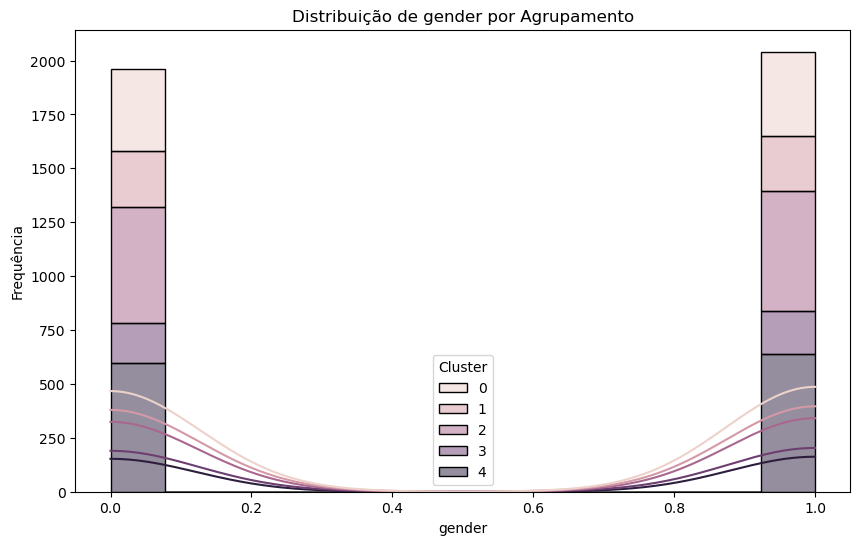

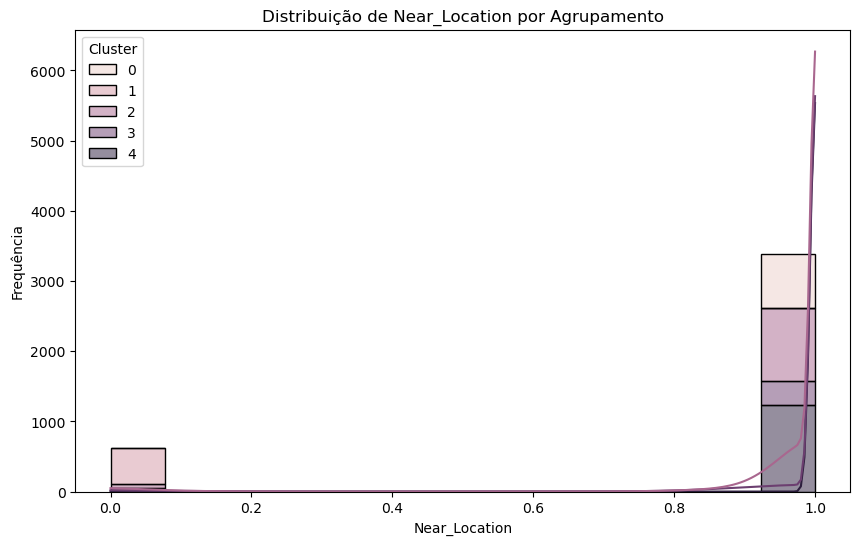

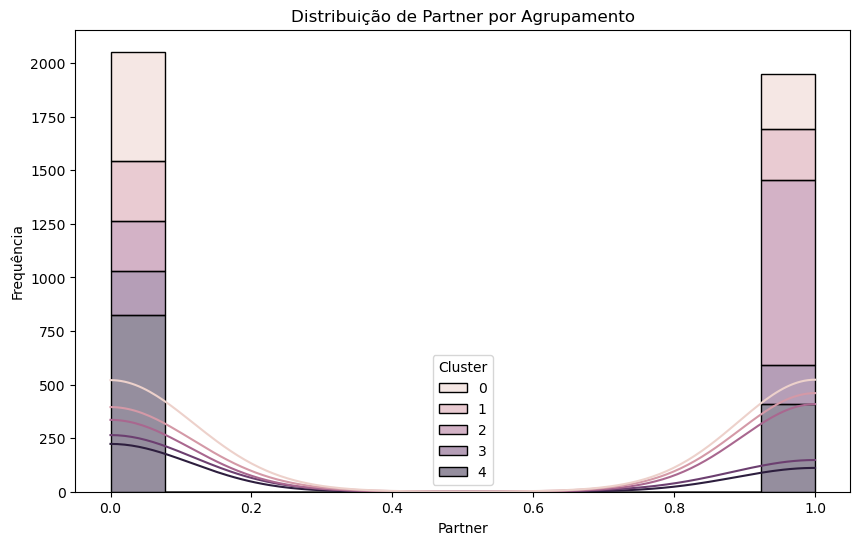

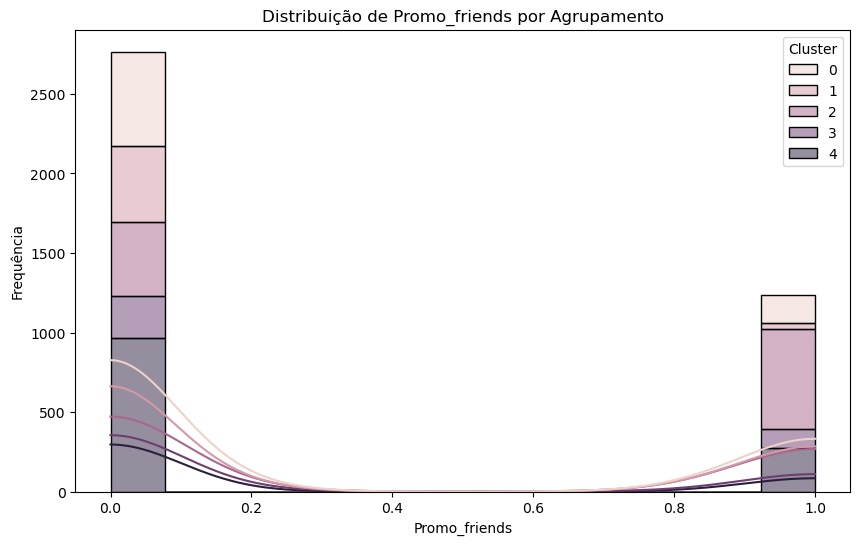

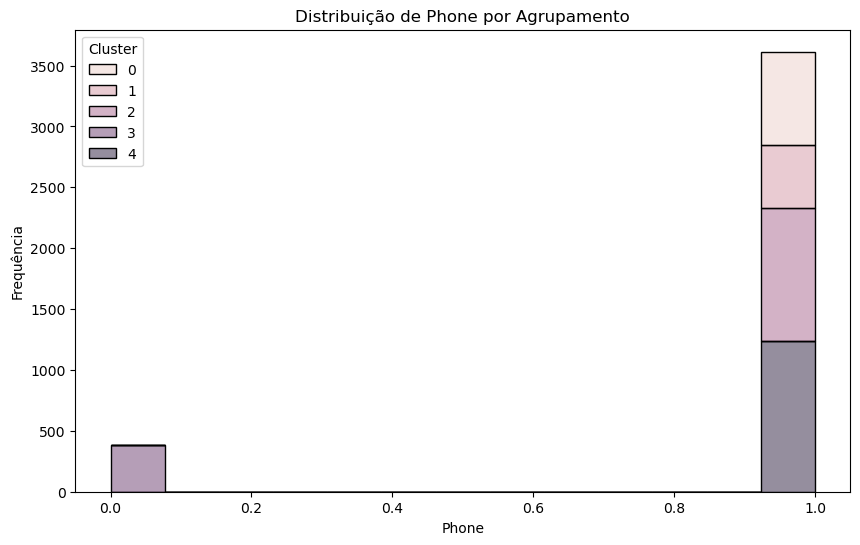

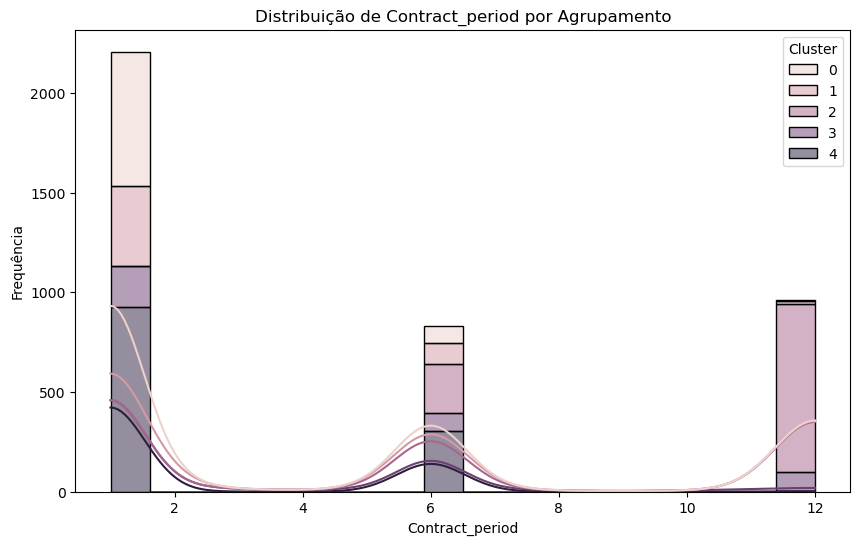

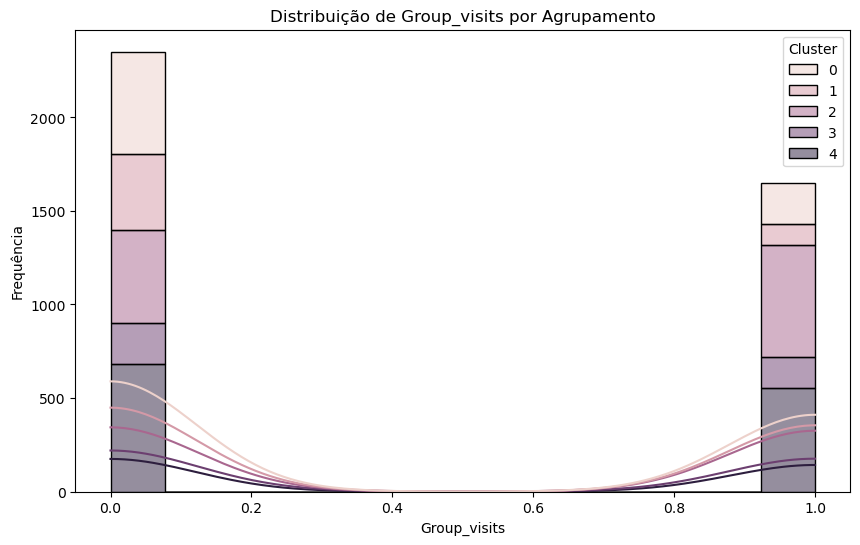

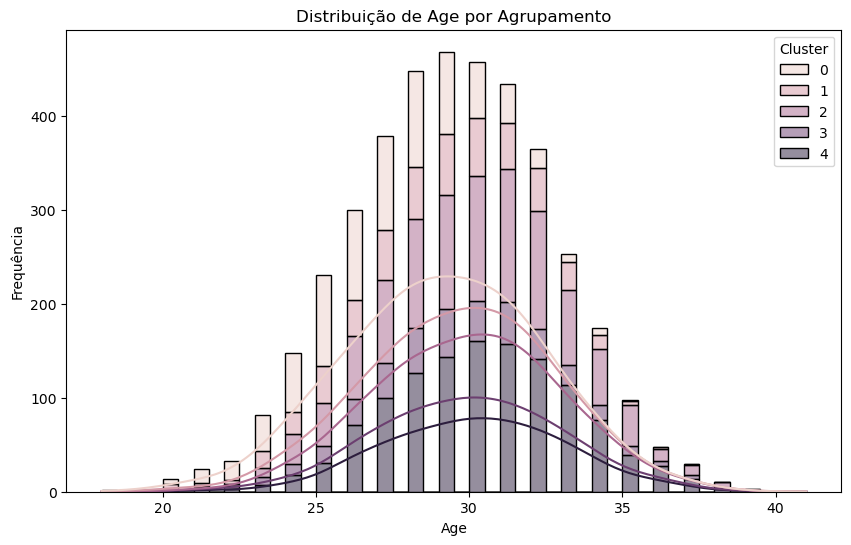

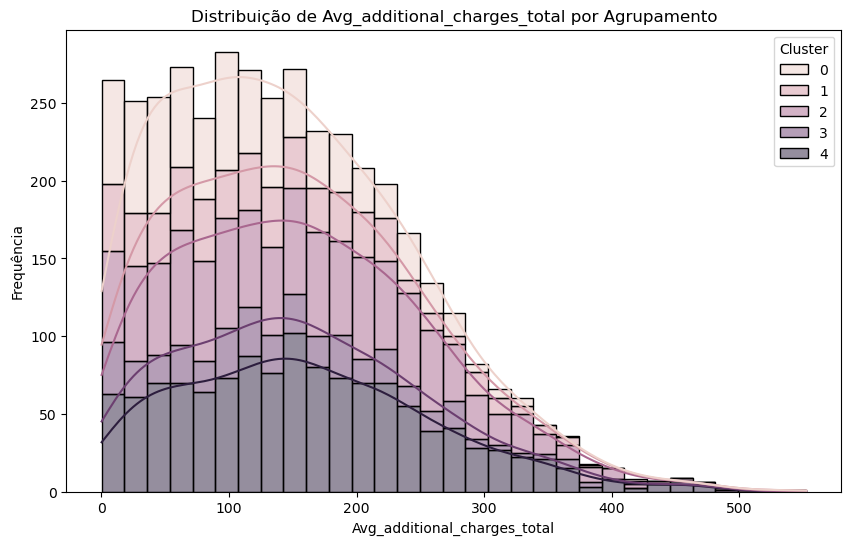

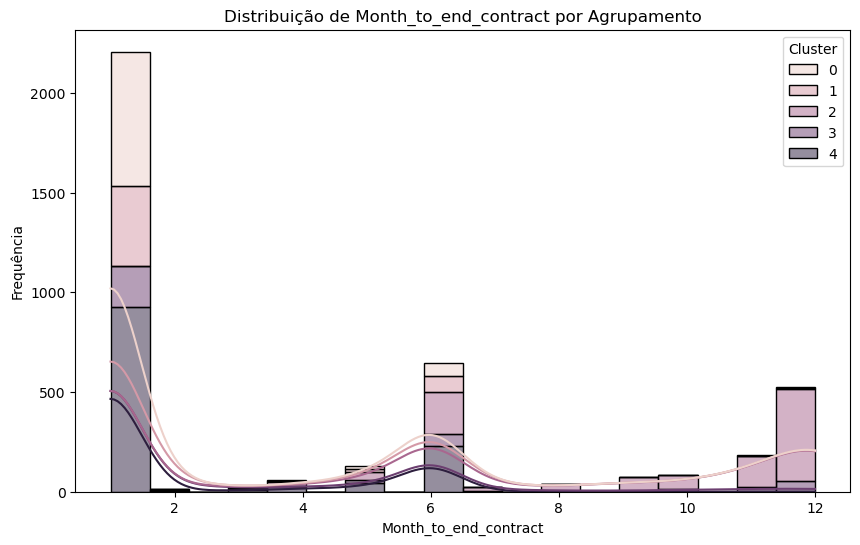

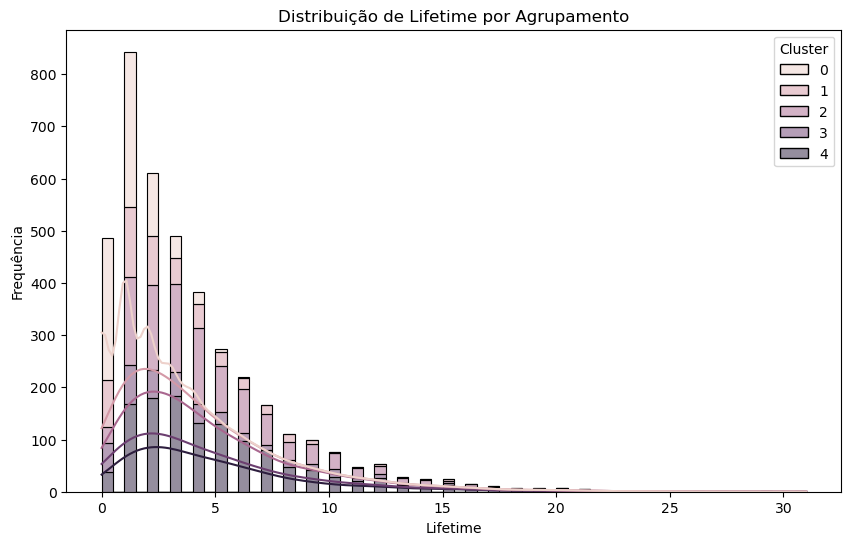

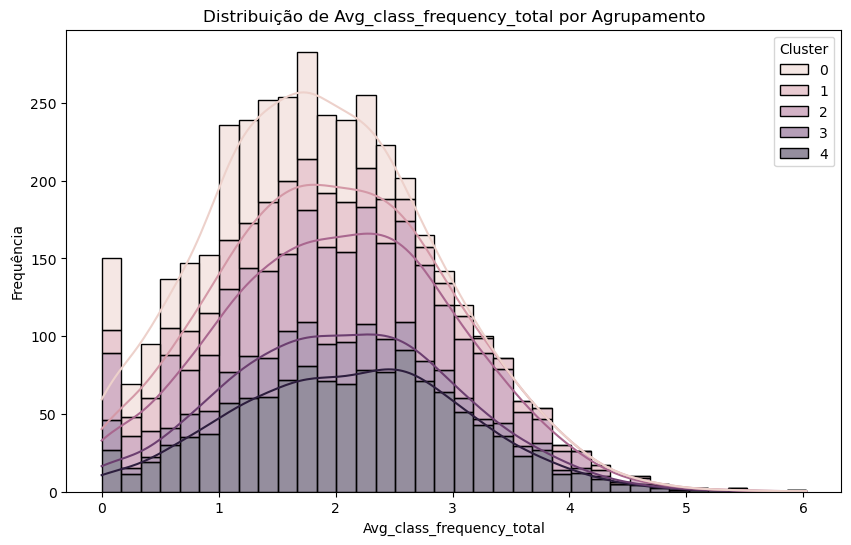

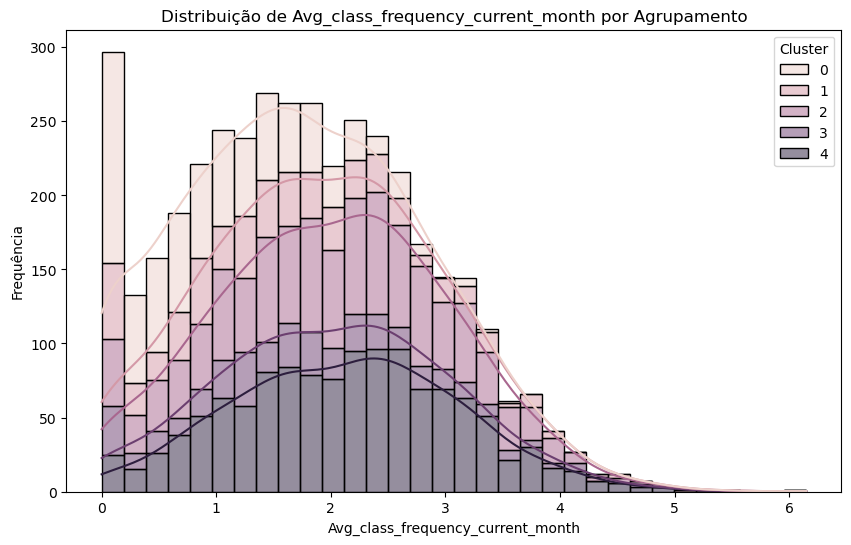

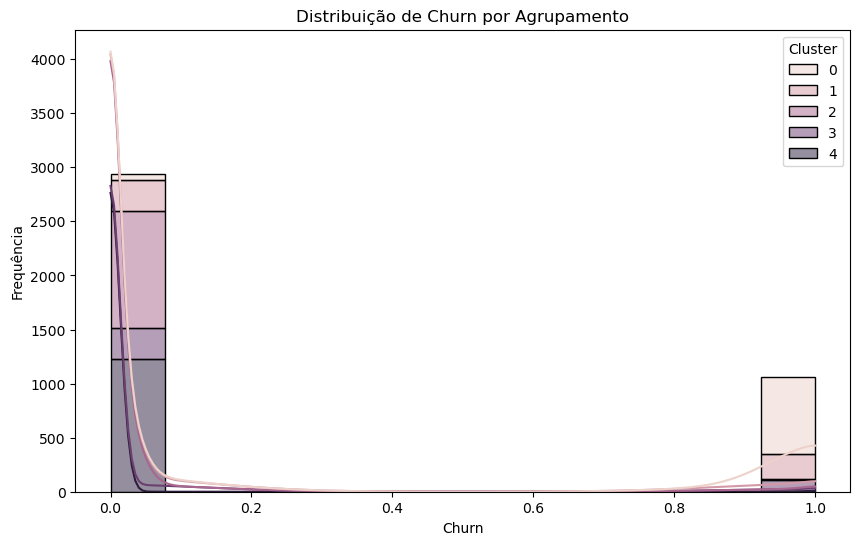

In [14]:
# 5. Treinando o modelo K-means
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_numerico['Cluster'] = kmeans.fit_predict(features_scaled)

# 6. Analisando os agrupamentos
# Calculando as médias das características para cada agrupamento
mean_values = df_numerico.groupby('Cluster').mean()
print("Valores Médios das Características por Agrupamento:")
print(mean_values)

# 7. Calculando a taxa de rotatividade para cada agrupamento
churn_rate = df_numerico.groupby('Cluster')['Churn'].mean()
print("\nTaxa de Rotatividade por Agrupamento:")
print(churn_rate)

# 8. Visualizando distribuições de características para os agrupamentos
for col in features.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_numerico, x=col, hue='Cluster', multiple='stack', kde=True)
    plt.title(f'Distribuição de {col} por Agrupamento')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.show()


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto. Senti falta apenas de uma caracterização dos agrupamentos. Exemplo: cluster 1 é jovem, solteiro, mora perto, cluster 2 é casado, sem filhos, tem pet. Análises assim são importantes.m
</div>

# Estratégias de Marketing

1. Com base nos dados analisados, identificamos algumas correlações significativas que podem ser utilizadas para desenvolver estratégias de marketing eficazes e reduzir a taxa de desistência na academia.

2. Promoções na Aproximação do Fim do Contrato: Observamos que a maior correlação com a desistência está relacionada à proximidade do término do contrato. Portanto, uma estratégia eficaz seria enviar promoções especiais aos clientes quando a data de renovação se aproximar. Isso pode incentivá-los a renovar seus contratos.

3. Frequência de Uso: Clientes com baixa frequência de uso da academia apresentam uma probabilidade maior de desistência. Para abordar esse problema, podemos implementar campanhas de engajamento, como desafios ou aulas experimentais, para motivar esses clientes a frequentar mais a academia.

4. Duração do Contrato: Notamos que clientes com contratos de maior duração têm uma menor probabilidade de desistir. Assim, oferecer opções de contratos mais longos pode ser uma estratégia eficaz para aumentar a retenção.

5. Fidelização de Clientes Antigos: Clientes mais antigos tendem a permanecer na academia por mais tempo. Isso indica que devemos focar em estratégias de fidelização para os clientes mais recentes, oferecendo incentivos para que optem por contratos de maior duração e se sintam parte da comunidade da academia.